In [56]:
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import matplotlib

In [2]:
path = "C:/Users/fkoze/Desktop/Data_Science/Projects/All/SF_Bike_Data/"
database = path + 'database.sqlite'

In [3]:
conn = sqlite3.connect(database)

read = pd.read_sql

tables = read("""SELECT *
                    FROM sqlite_master
                    WHERE type='table'
                    ;""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,station,station,2,CREATE TABLE station (\n id INTEGER PRIMARY...
1,table,status,status,3,"CREATE TABLE status (\n station_id INTEGER,..."
2,table,trip,trip,4,CREATE TABLE trip (\n id INTEGER PRIMARY KE...
3,table,weather,weather,5,"CREATE TABLE weather (\n date TEXT,\n ma..."


In [4]:
#Trips with longest duration

read("""SELECT *
            FROM trip
            ORDER BY duration DESC
            LIMIT 10
            ;""", conn)

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
1,825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
2,750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
3,841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
4,111309,722236,11/30/2013 13:29,University and Emerson,35,12/8/2013 22:06,University and Emerson,35,247,Customer,94301
5,522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
6,323594,716480,6/13/2014 16:57,Harry Bridges Plaza (Ferry Building),50,6/21/2014 23:59,Civic Center BART (7th at Market),72,633,Subscriber,94131
7,361321,715339,7/13/2014 5:50,Arena Green / SAP Center,14,7/21/2014 12:32,Adobe on Almaden,5,251,Customer,nil
8,774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
9,635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451


In [5]:
#Amount of trips that are longer than 24h

read("""SELECT count(*)
            AS \'Long Trips\'
        FROM trip  
        WHERE duration >= 60*60*24
        ;""", conn)

,Long Trips
0,296


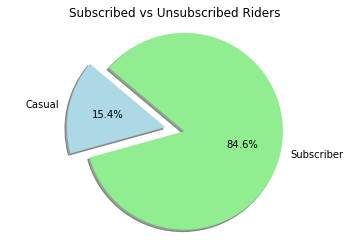

In [6]:
#Proportion of unregistered users

df = read("""SELECT subscription_type, 
                count(*) AS count
            FROM trip
            GROUP BY subscription_type
            ;""",conn)


labels = ['Casual', 'Subscriber']
sizes = df['count']
colors = ['lightblue', 'lightgreen']
explode = (0.2, 0) 


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('Subscribed vs Unsubscribed Riders')
plt.axis('equal')

plt.show()

In [7]:
#Average duration of the trip

read("""SELECT subscription_type,
            AVG(duration)/60 AS 'Average Duration'
        FROM trip        
        GROUP BY subscription_type        
        ;""", conn)

,subscription_type,Average Duration
0,Customer,65.862689
1,Subscriber,9.834148


In [8]:
#Most popular stations

read("""SELECT station.name AS Station, 
            count(*) AS Count
        FROM station        
        INNER JOIN trip
        ON station.id = trip.start_station_id
        GROUP BY station.name        
        ORDER BY count DESC
        LIMIT 7        
        ;""", conn)

,Station,Count
0,San Francisco Caltrain (Townsend at 4th),49092
1,San Francisco Caltrain 2 (330 Townsend),33742
2,Harry Bridges Plaza (Ferry Building),32934
3,Embarcadero at Sansome,27713
4,Temporary Transbay Terminal (Howard at Beale),26089
5,2nd at Townsend,25837
6,Steuart at Market,24838


In [9]:
# Stations with most empty readings (meaning, no bikes left to rent)

read("""SELECT station.name AS Station, 
            count(*) AS 'Total Empty Readings'
        FROM station        
        INNER JOIN status
        ON status.station_id=station.id
        WHERE status.bikes_available=0
        GROUP BY station.name
        ORDER BY count(*) DESC
        LIMIT 10        
        ;""",conn)

,Station,Total Empty Readings
0,Commercial at Montgomery,29198
1,Market at 4th,24725
2,Embarcadero at Vallejo,24401
3,2nd at Folsom,24077
4,Embarcadero at Sansome,23143
5,San Francisco Caltrain (Townsend at 4th),21726
6,Grant Avenue at Columbus Avenue,20739
7,Clay at Battery,19080
8,Broadway St at Battery St,17824
9,2nd at South Park,17111


<AxesSubplot:title={'center':'Bikes Available (All Stations)'}, ylabel='Frequency'>

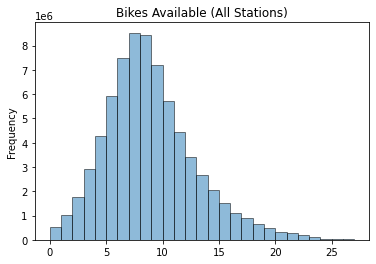

In [10]:
# Distribution of available bikes for all stations

df = read("""SELECT bikes_available AS 'Bikes Available'
            FROM status
            ;""",conn)

df['Bikes Available'].plot.hist(bins=27, title='Bikes Available (All Stations)', ec='black', alpha=0.5)

In [11]:
# Most popular routes

read("""SELECT start_station_name, 
            end_station_name, 
            COUNT(*) AS Count
        FROM trip
        GROUP BY start_station_name, end_station_name
        ORDER BY Count DESC
        LIMIT 10
        ;""",conn)

,start_station_name,end_station_name,Count
0,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,6216
1,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,6164
2,Townsend at 7th,San Francisco Caltrain (Townsend at 4th),5041
3,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4839
4,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4357
5,Embarcadero at Sansome,Steuart at Market,4269
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3967
7,Steuart at Market,2nd at Townsend,3903
8,2nd at South Park,Market at Sansome,3627
9,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),3622


In [38]:
df = read("""SELECT start_date FROM trip;""", conn)

In [39]:
df.start_date = pd.to_datetime(df.start_date, format='%m/%d/%Y %H:%M')

In [40]:
df['date'] = df.start_date.dt.date

In [41]:
dates = {}
for d in df.date:
    if d not in dates:
        dates[d] = 1
    else:
        dates[d] += 1

In [42]:
df2 = pd.DataFrame.from_dict(dates, orient = "index")
df2['date'] = df2.index
df2['trips'] = df2.loc[:,0]

In [46]:
df2.drop(labels=0, axis = 1)

,date,trips
2013-08-29,2013-08-29,748
2013-08-30,2013-08-30,714
2013-08-31,2013-08-31,640
2013-09-01,2013-09-01,706
2013-09-02,2013-09-02,661
...,...,...
2015-08-27,2015-08-27,1443
2015-08-28,2015-08-28,1220
2015-08-29,2015-08-29,342
2015-08-30,2015-08-30,331


In [57]:
dates = matplotlib.dates.date2num(df2['date'])


AttributeError: 'Line2D' object has no property 'figsize'

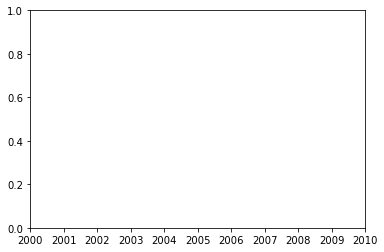

In [70]:
matplotlib.pyplot.plot_date(dates, df2['trips'], color = 'red', figsize=(12,7))